---
Projeto para análise de concessão de créditos

## Carregar base de Dados

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
# poderíamos usar a função pd.read, porém, teríamos que configurar vários parâmetros para ler essa tabela. Essa função já oferece parâmetros mais usuais para leitura de arquivo txt. Essa base original tem separador por 'tab'.
data = pd.read_table('credito.txt')
data.head()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [3]:
data.tail()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
2072,0,0,480,1,398,6,89,0,33,84,0,0
2073,1,0,773,0,699,6,131,0,63,48,0,0
2074,0,3,1200,0,495,4,145,0,39,6,0,1
2075,1,0,600,0,572,15,68,0,33,6,0,1
2076,0,0,800,1,429,10,60,0,29,6,0,0


In [4]:
# linhas 100 a 110, todas as colunas
data.iloc[100:111,:]

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
100,0,0,3400,1,1629,18,175,0,53,6,0,1
101,0,0,619,0,599,15,70,0,27,6,2,1
102,1,0,1600,0,383,1,404,0,29,48,0,1
103,0,0,700,1,485,10,74,0,33,6,0,0
104,0,0,1200,0,602,4,137,0,43,0,137,1
105,0,0,1700,1,314,2,107,0,39,108,107,0
106,0,0,600,1,738,10,102,0,32,6,0,1
107,1,0,300,0,452,12,62,1,37,144,0,1
108,1,0,500,0,450,4,114,0,45,48,0,1
109,0,2,740,1,480,10,67,0,34,6,0,1


In [5]:
data.shape

(2077, 12)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ESTC,2077.0,0.521907,0.674420,0.0,0.0,0.0,1.0,3.0
NDEP,2077.0,0.122292,0.556507,0.0,0.0,0.0,0.0,7.0
RENDA,2077.0,969.541647,897.707359,300.0,470.0,640.0,1150.0,9675.0
TIPOR,2077.0,0.447280,0.497333,0.0,0.0,0.0,1.0,1.0
VBEM,2077.0,563.794415,292.360830,300.0,404.0,489.0,618.0,6000.0
NPARC,2077.0,8.395282,3.614923,1.0,6.0,10.0,10.0,24.0
VPARC,2077.0,102.666346,64.315987,50.0,66.0,83.0,118.0,719.0
TEL,2077.0,0.128069,0.334247,0.0,0.0,0.0,0.0,1.0
IDADE,2077.0,41.204622,13.276082,18.0,31.0,39.0,52.0,70.0
RESMS,2077.0,30.901300,51.960972,0.0,6.0,6.0,48.0,420.0


## Separar base em treino e teste

In [8]:
# Vamos analisar a proporção de clientes que pagaram e não pagaram empréstimo
data.CLASSE.value_counts()

# Observe que parece estar bem balanceada. 1091 pagaram e 986 não pagaram. Como essa base já foi pré processada (tratada) e pegamos ela pronta, acreditamos que foi feito algum tipo de balanceamento nela.

CLASSE
0    1091
1     986
Name: count, dtype: int64

In [9]:
# train_test_split - função para dividir em treino e teste

from sklearn.model_selection import train_test_split
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.

# Entrada
X = data.loc[:, data.columns != 'CLASSE']  # Todas as linhas e todas as colunas que forem diferentes de CLASSE, que é a coluna de saída, nosso label

# Saída
y = data.CLASSE # Nossa coluna classe com todas as linhas

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y)

In [10]:
y.value_counts()

CLASSE
0    1091
1     986
Name: count, dtype: int64

In [11]:
# Verificar proporção para teste para confirmar amostragem estratificada
print(0.2*y.value_counts()[0])
print(0.2*y.value_counts()[1])

218.20000000000002
197.20000000000002


In [12]:
y_test.value_counts()

CLASSE
0    219
1    197
Name: count, dtype: int64

In [13]:
y_train.value_counts() # o restante da base, 80%

CLASSE
0    872
1    789
Name: count, dtype: int64

In [14]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1661, 11)
(416, 11)
(1661,)
(416,)


## Pré Processamento

### Missing

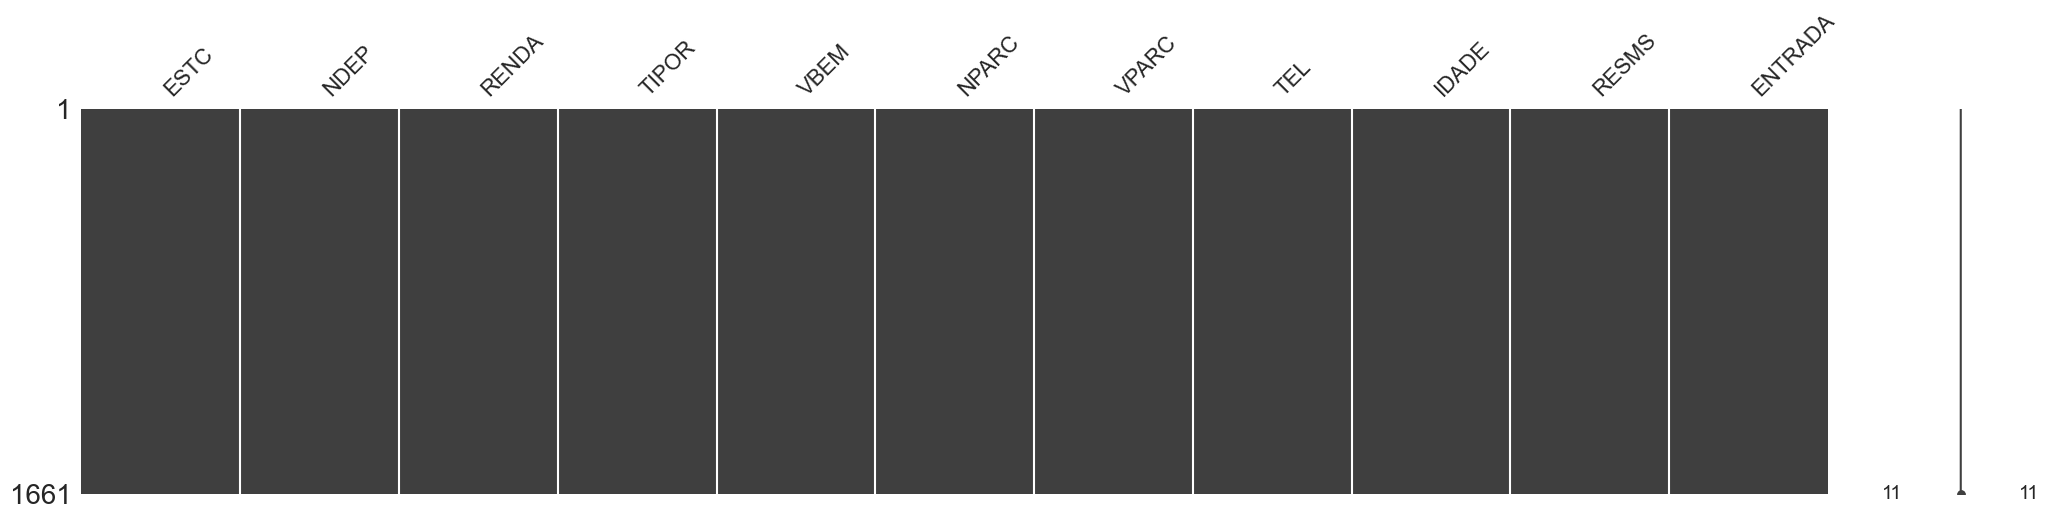

In [15]:
# Visualizar missing
import missingno as msno
msno.matrix(X_train, figsize=(25,5));

Não temos nenhum missing!

In [17]:
# remover colunas com variância zero
from sklearn.feature_selection import VarianceThreshold
zero_var_filter = VarianceThreshold()
X_train = zero_var_filter.fit_transform(X_train)

In [18]:
# colunas com variância zero
(zero_var_filter.variances_ == 0).sum()

0

In [19]:
# novo shape
pd.DataFrame(X_train).shape

(1661, 11)

Não temos nenhuma coluna com variância zero!

## Machine Learning - SVM

In [20]:
# treinar modelo. Observe que não estamos usando o linear SVC. no SVC conseguimos definir um Kernel, que é o truque do kernel.
# No linear SVC nós não conseguimos definir o Kernel
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # crio o modelo e usa o custo de 1 (definimos no início o seed)
  model.fit(X_train, y_train)     # treino o modelo
  return model

model = train(X_train, y_train, seed)

In [21]:
model

SVC(random_state=1)

### Avaliar modelo treinado na base de teste

In [22]:
X_test.shape

(416, 11)

In [23]:
# remover as mesmas colunas removidas por variância zero. 
# Nesse caso não houveram tais atributos. 
# Deixo o código caso tenham um caso que ocorra. 
# Aqui não fará nenhuma diferença.

X_test = zero_var_filter.transform(X_test)
X_test.shape

(416, 11)

Resultados de Treino
Acurácia:  0.6381697772426249
Kappa:  0.2657140608415306
F1:  0.5641769398114576


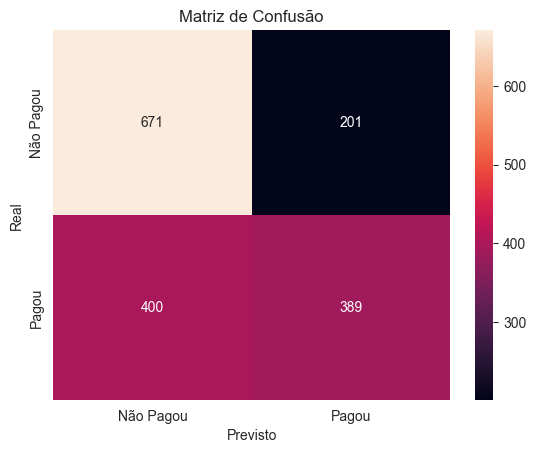

Resultados de Teste
Acurácia:  0.5961538461538461
Kappa:  0.17873510540788262
F1:  0.5058823529411763


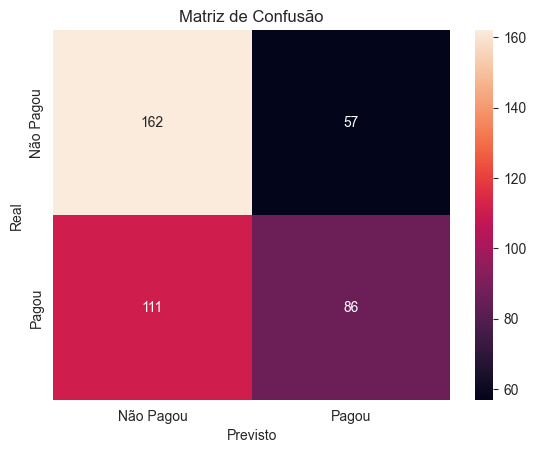

In [24]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1 - Faz uma relação do recall com a precision. Uma média harmônica que ele faz. É uma métrica interessante para se utilizar nos problemas de classificação
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Não Pagou', 'Pagou']) 
  ax.yaxis.set_ticklabels(['Não Pagou', 'Pagou'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)

print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

Observe na matriz de confusão de treino que os resultados não ficaram bons. O pior erro que tem nesse caso, é conceder empréstimo para alguém que não vai pagar, o que está sendo demonstrado na linha de não pagou, coluna pagou, com 201. Esse tipo de erro pode custar caro para o banco!

Ao replicar o modelo de treino para a base de teste, observe que os resultados pioraram. Ficou com bias alto e variância baixa. O modelo claramente não ajustou o conjunto de dados.

É muito importante analisarmos o modelo na base de teste e de treino, pois podemos ter uma idéia do que está acontecendo com o nosso modelo. Por exemplo, se o nosso modelo está com 100% na base de treino e 20% na base de teste, fica claro que o nosso modelo está tendo um sobreajuste (overfitting). O modelo está muito especialiado no treino e não está conseguindo generalizar.

### Normalizar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train) # gero o modelo de pré-processamento no treino
X_train = scaler.transform(X_train) # aplico o modelo no treino
X_test = scaler.transform(X_test)   # aplico o modelo no teste

In [ ]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed)

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)

print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                     
# Executar o grid search
model = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train);

In [ ]:
model.best_params_

In [ ]:
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

# Inferir novos dados com modelo treinado!

In [ ]:
# 1. Carreguei os dados sem o rótulo
new_data = pd.read_table('credito_sem_rotulo.txt')
new_data.head(8)

In [ ]:
# 2. Aplicar os pré processamentos feitos no treino
new_data_filtered = zero_var_filter.transform(new_data)
new_data_normalized = scaler.transform(new_data_filtered)

In [ ]:
# 3. Faço as inferências
inferences = model.predict(new_data_normalized)

In [ ]:
inferences

In [ ]:
# 4. Visualizar inferências juntamente com a base original
new_data['previsões'] = inferences
new_data.head(8)

In [ ]:
new_data.to_csv('results.csv')